<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/PSD_histogram_CNN_AA_jun_23_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [ ]:
!pip install mahotas

  Using cached https://files.pythonhosted.org/packages/19/ad/553b246b0a35dccc3ed58dc8889a67124bf5ab858e9c6b7255d56086e70c/mahotas-1.4.11-cp37-cp37m-manylinux2010_x86_64.whl


In [ ]:
import mahotas.features.texture as mht
import mahotas.features

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 361, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 361 (delta 38), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (361/361), 202.49 MiB | 20.90 MiB/s, done.
Resolving deltas: 100% (155/155), done.
/content/marquesgabi_fev_2020/Doutorado


In [ ]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 20.26 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [ ]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [ ]:
df=Segmenta(img)
Img_Size = 28

In [ ]:
print(df)

    Width           0           1  ...         781         782         783
0     172  128.560852  104.868042  ...    1.000000    1.000000    1.000000
1     132  159.814514  113.319565  ...    0.837466    1.000000    1.000000
2     126   68.740738   70.617287  ...  163.666656  161.024704  161.716064
3     160  133.569992  121.837494  ...    0.995625    1.000000    1.000000
4     185  133.480072  126.348328  ...  172.583511  174.186264  173.315018
5     120  193.071106  194.115555  ...  207.606659  200.387802  196.745575
6     119  165.121109  176.560562  ...  152.944641  157.851212  153.380615
7     188  174.279297  162.649155  ...    2.896786    1.196016    2.277049
8     170  121.297722  135.785187  ...  139.556000  181.818832  169.552811
9     143  111.593330  107.247688  ...  147.044403  175.823410  202.266861
10    165  145.679565  147.861084  ...  160.245636  145.103928  146.523560
11    176  130.520645  127.806816  ...  144.679245  128.433884  122.654442
12    169    0.698085    

In [ ]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 20.54 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [ ]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [ ]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

'''
model = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh', 
                      solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)
  
prediction = model.predict(X_test)
  
y =np.copy(y_test)
data = {'y_true': y_test,'y_predict': prediction}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)
'''

"\nmodel = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh', \n                      solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)\n  \nprediction = model.predict(X_test)\n  \ny =np.copy(y_test)\ndata = {'y_true': y_test,'y_predict': prediction}  # este dado esta no formato de dicionario\n\ndf = pd.DataFrame(data, columns=['y_true','y_predict'])\n\n\nconfusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])\nprint(confusion_matrix)\n\ny_true = df['y_true']\ny_pred = df['y_predict']\n\n  \nMETRICS=sklearn.metrics.classification_report(y_true, y_pred)\n"

In [ ]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=200))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

# gives us back a <keras.callbacks.History object at 0x112e61a90>
model.fit(X_train, Y_train, epochs=15, batch_size=32)


Epoch 1/15
11/11 [==============================] - 19s 43ms/step - loss: 0.6628 - accuracy: 0.6747
Epoch 2/15
11/11 [==============================] - 0s 42ms/step - loss: 0.2613 - accuracy: 0.9046
Epoch 3/15
11/11 [==============================] - 0s 41ms/step - loss: 0.1423 - accuracy: 0.9618
Epoch 4/15
11/11 [==============================] - 0s 43ms/step - loss: 0.1559 - accuracy: 0.9347
Epoch 5/15
11/11 [==============================] - 0s 42ms/step - loss: 0.0819 - accuracy: 0.9680
Epoch 6/15
11/11 [==============================] - 0s 42ms/step - loss: 0.0523 - accuracy: 0.9847
Epoch 7/15
11/11 [==============================] - 0s 42ms/step - loss: 0.0354 - accuracy: 0.9911
Epoch 8/15
11/11 [==============================] - 0s 41ms/step - loss: 0.0436 - accuracy: 0.9719
Epoch 9/15
11/11 [==============================] - 0s 42ms/step - loss: 0.0398 - accuracy: 0.9855
Epoch 10/15
11/11 [==============================] - 0s 43ms/step - loss: 0.0192 - accuracy: 0.9917
Epoch 11

In [ ]:
Y_test = yback(Y_test)

In [ ]:
pred_test= model.predict_classes(X_test)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predict   1
Actual     
0        72
1        75


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction = model.predict_classes(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


    Width           0           1  ...         781         782         783
1   124.0   25.505722   29.328823  ...   34.349632   33.451611   32.123825
2   190.0   45.199112   56.401764  ...   76.960884   76.430916   78.788589
3   118.0    2.875323    3.463660  ...  103.385513  101.955193  102.375183
4   127.0   44.303741   46.770599  ...   35.613117   38.468102   40.135406
5   129.0  122.393661  123.243370  ...   31.328587   33.250168   33.818760
7   180.0  108.672607  114.212364  ...   41.209385   44.285431   48.787163
8   174.0   64.076500   64.455673  ...   94.820724   92.970940   86.108742
9   166.0  104.227753  110.923058  ...    2.932356    1.630280    1.258093
10  129.0   79.254066   80.119522  ...   84.817261   85.166031   86.938400
11  155.0    5.583018    6.897398  ...   45.605865   45.838085   45.679504
12  179.0   93.198898   97.309822  ...   48.526669   42.601009   44.481228
13  126.0   15.641974   66.901237  ...    0.123457    0.111111    0.283951
14  128.0  100.817383  10

In [ ]:
Width=np.array(Width_new)

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 588, done.
remote: Counting objects: 100% (349/349), done.
remote: Compressing objects: 100% (348/348), done.
remote: Total 588 (delta 212), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (588/588), 5.07 MiB | 5.94 MiB/s, done.
Resolving deltas: 100% (349/349), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 5.68 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [ ]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [ ]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
1,124.0,25.505722,29.328823,26.470341,24.184181,90.517159,121.400620,125.195633,115.778351,112.759613,111.614975,109.709671,109.064514,107.268471,98.953171,95.650360,97.568153,101.071793,103.157127,101.575432,109.122787,118.390213,126.406860,125.708626,84.303848,42.976063,45.126953,40.655563,35.252861,23.706554,28.963579,25.386055,26.882414,59.874084,120.341301,132.835587,127.740891,115.763779,109.947960,110.431839,...,41.744015,25.424557,30.678459,28.447449,29.847033,30.881372,33.792923,35.340271,35.316334,35.189384,33.249737,32.896980,104.377731,114.875122,128.752335,114.244530,89.235168,86.793961,83.522369,85.724243,90.934433,99.817902,109.027054,81.600418,73.636826,76.096771,74.782516,64.272629,32.397503,19.904264,19.446409,19.838707,20.585848,23.657646,27.592091,31.272633,33.270550,34.349632,33.451611,32.123825
2,190.0,45.199112,56.401764,59.520992,44.005867,27.170414,24.518890,26.055067,31.495953,35.826702,45.940388,56.992905,72.822044,82.100609,87.551468,89.665924,90.172073,94.365532,102.049522,109.018829,116.499168,119.318100,112.305145,95.245865,84.311798,83.445869,90.353348,89.840668,94.938057,39.948368,43.793690,45.887756,44.336952,44.537502,44.347588,44.526867,41.854733,42.705151,46.835453,49.106144,...,77.237671,73.573181,70.953789,70.038116,73.532631,97.991577,109.292740,81.878006,70.292740,73.139725,75.985703,75.693405,125.897049,122.791237,119.355125,117.920876,117.924316,117.812180,117.504913,120.430801,122.099396,132.443771,141.310791,143.300369,141.639648,137.338257,118.549133,86.786476,76.821503,75.413406,74.044319,71.348701,83.840439,108.347252,110.109146,79.654396,73.180939,76.960884,76.430916,78.788589
3,118.0,2.875323,3.463660,5.651824,9.828784,27.769608,75.118065,88.331230,88.824760,85.514221,81.766449,80.630844,78.603844,76.353638,69.490662,58.093079,45.730537,37.853489,32.052856,30.843145,31.248777,30.863832,32.688019,38.385231,46.354206,51.644642,56.653549,60.572247,60.289570,6.755243,9.297041,10.910083,13.015224,18.089630,51.723640,81.754959,84.943123,81.344154,77.165466,76.791145,...,32.734268,31.046249,30.410801,30.076988,46.536339,89.170639,101.519394,106.845451,110.519104,110.509903,108.021835,101.628838,66.249634,57.141338,43.103127,43.579430,44.693192,50.688591,54.197067,55.699512,58.005741,57.781101,60.872162,58.192474,58.477158,51.120079,43.193619,34.405342,28.560183,28.334961,29.785120,32.441254,35.228668,62.671928,91.084457,100.416252,102.994827,103.385513,101.955193,102.375183
4,127.0,44.303741,46.770599,46.652554,45.918720,46.405540,45.002357,45.373238,44.815739,41.871040,36.130943,31.993055,31.200075,31.416889,29.198895,29.071238,30.967203,33.760677,36.380554,35.652737,38.486019,48.448448,62.913078,78.175514,86.525955,96.883629,102.631531,101.784798,102.425262,54.779778,53.353031,49.419739,45.265984,43.673069,43.633888,43.219730,39.822861,31.543308,24.937443,26.061134,...,128.674683,128.396667,116.114265,18.181475,36.099945,37.740097,36.948231,34.388744,34.121647,36.165413,38.304047,40.904331,103.197968,107.120087,107.974152,108.576416,106.841713,101.814743,90.929878,84.630417,82.426437,81.049789,84.455025,87.748100,92.427734,100.588196,111.059517,120.589432,125.971977,126.168900,117.728256,21.854610,35.571701,36.883255,34.351791,33.638912,34.159344,35.613117,38.468102,40.135406
5,129.0,122.393661,123.243370,127.656624,135.031555,148.597580,155.364456,160.182327,165.797852,162.872772,151.072403,97.280151,62.324562,69.369446,66.254005,62.048553,60.409107,60.722488,64.037560,66.778496,67.879028,69.217354,78.205879,85.704880,92.796768,106.325508,115.969177,118.451599,124.222160,123.575439,124.877052,128.443008,134.684341,146.042557,154.534821,157.188629,156.933838,153.858673,142.809204,95.202271,...,8.626044,4.35082

In [ ]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

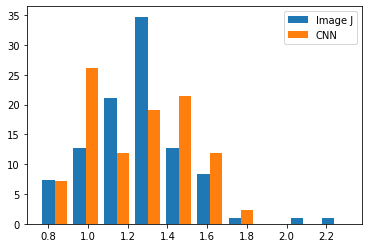

In [ ]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

<a list of 2 Lists of Patches objects>
[0.75356807 0.90995518 1.06634229 1.22272941 1.37911652 1.53550363
 1.69189074 1.84827785 2.00466497 2.16105208 2.31743919]
[[ 7.36842105 12.63157895 21.05263158 34.73684211 12.63157895  8.42105263
   1.05263158  0.          1.05263158  1.05263158]
 [ 7.14285714 26.19047619 11.9047619  19.04761905 21.42857143 11.9047619
   2.38095238  0.          0.          0.        ]]


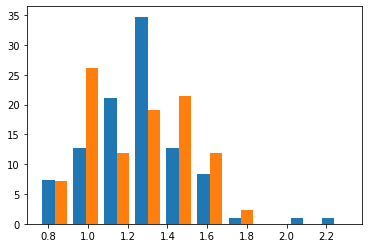

In [ ]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [ ]:
print(counts.sum())

200.00000000000009


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


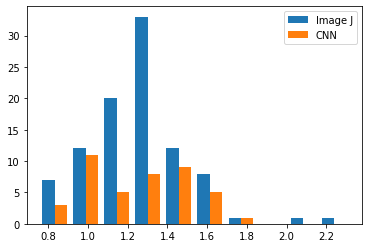

In [ ]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [ ]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1